# Lab 12: Hidden Markov Models

## Sampling from HMM

Automatically created module for IPython interactive environment


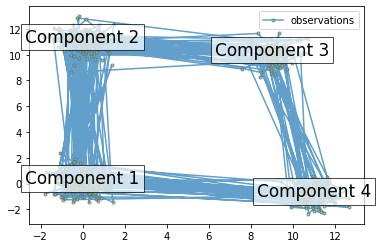

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

#Prepare parameters for a 4-components HMM Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])

# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

## Fit HMM

In [2]:
#Consider two 1D sequences:

X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]
X2 = [[2.4], [4.2], [0.5], [-0.24]]

#To pass both sequences to fit or predict, first concatenate them into a single array and then compute an array of sequence lengths:

X = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]

#Finally, just call the desired method with X and lengths:
model  = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(X, lengths)

Z = model.predict(X)

print(Z)

#monitor convergence
model.monitor_.converged

#saving and loading hmm
import pickle
with open("filename.pkl", "wb") as file: pickle.dump(model, file)
with open("filename.pkl", "rb") as file: pickle.load(file)

Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.


[2 0 0 2 0 0 0 2 0]
